# Introduction to Sentiment Analysis

Anneke Dresselhuis, Irene Berezin  
2024-07-04

<br>

<figure>
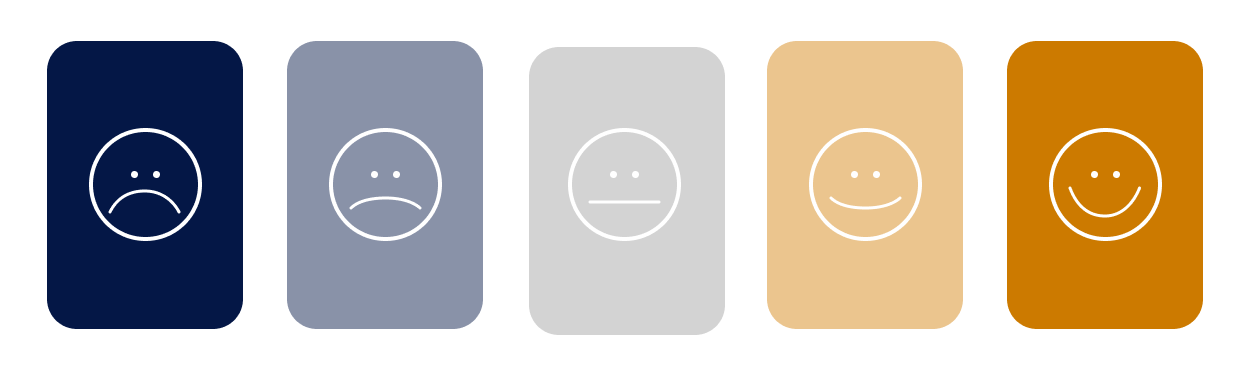
<figcaption aria-hidden="true">Cover Art Image</figcaption>
</figure>

### Loading and Installing Packages

In [ ]:
# un-comment the packages that need to be installed. Installation may take a while.

#install.packages("tidytext")
#install.packages("ggplot2")
#install.packages("RcppParallel")
#install.packages("quanteda")
#install.packages("tidytext")
#install.packages("SentimentAnalysis")
#install.packages("textdata")
#install.packages("RColorBrewer")
#install.packages("RedditExtractoR")
#install.packages("wordcloud")

In [ ]:
# these may take a while to load
library(tidytext)
library(ggplot2)
library(readr)
library(tidyverse)
library(RcppParallel)
library(quanteda)
library(janeaustenr)
library(dplyr)
library(tidyr)
library(stringr)
library(lubridate)
library(ggplot2)
library(scales)
library(reshape2)
library(dplyr)
library(RColorBrewer)

### Prerequisites

1.  Introduction to Jupyter
2.  Introduction to R

### Learning outcomes

After completing this notebook, you will be able to: <br> 1. Understand
and apply the principles of “tidy text” data to clean a textual dataset
2. Perform basic sentiment analysis using Reddit and the RedditExtractoR
package.

## What is Sentiment Analysis?

“Sentiment analysis is the practice of applying natural language
processing and text analysis techniques to identify and extract
subjective information from text” (Hussein, 2018). As this definition
alludes, sentiment analysis is a part of natural language processing
(NLP) which is a field that exists at the intersection of human language
and computation. Because humans are complex, emotional beings, the
language we use is often shaped by our affective (emotional)
dispositions. Sentiment analysis, sometimes referred to as “opinion
mining” is one way that researchers can methodologically understand the
emotional intentions that lie in a textual dataset.

> **🔎 **Let’s think critically\*\*\*\*
>
> 🟠 At the heart of sentiment analysis is the assumption that language
> reveals interior, affective states, and that these states can be
> codified and generalized to broader populations. In her book, [Atlas
> of AI](https://katecrawford.net/atlas) the artificial intelligence
> scholar Kate Crawford explores how many assumptions found in
> contemporary sentiment research (ie, that there are 7 universal
> emotions, etc) are largely unsubstantiated notions that emerged from
> mid 20th century research funded by US Department of Defense. Rather
> than maintaining that emotions can be universally categorized, her
> work invites researchers to think about how emotional expression is
> highly contextualized by social and cultural factors and the distinct
> subject positions of content makers.
>
> 🟠 Consider the research question for your sentiment analysis project.
> How might the text you are working with be shaped by the distinct
> communities that have generated it?
>
> 🟠 Are there steps you can take to educate yourself around the unique
> language uses of your dataset (for example, directly speaking with
> someone from that group or learning from a qualified expert on the
> subject)?
>
> 🟠 If you’re interested, you can learn more about data justice in
> community research in a
> [guide](https://genderplusresearchcollective.sites.olt.ubc.ca/files/2022/09/2022-Gender-Guide-1.pdf)
> created by UBC’s Office for Regional and International Community
> Engagement.

The rise of [web 2.0](https://en.wikipedia.org/wiki/Web_2.0) has
produced prolific volumes of user-generated content (UGC) on the
internet, particularly as people engage in a variety of social platforms
and forums to share opinions, ideas and express themselves. Maybe you
are interested in understanding how people feel about a particular
political candidate by examining tweets around election time, or you
wonder what people think about a particular bus route on reddit. UGC is
often unstructured data, meaning that it isn’t organized in a
recognizable way. <br>

**Structured data** for a microwave product review might look something
like this:

| <span style="color: #CC7A00">Pro</span> | <span style="color: #CC7A00">Con</span> | <span style="color: #CC7A00">Neutral</span> |
|:---------------|:-------------------------------------------|:-----------|
| <span style="color: #CC7A00">Interface is visually appealing</span> | <span style="color: #CC7A00">Hard to change the time</span> | <span style="color: #CC7A00">Purchased from store #553</span> |
| <span style="color: #CC7A00">Heats up food perfectly</span> | <span style="color: #CC7A00">Plug cord length is too short</span> | <span style="color: #CC7A00">Product weighed 23lbs</span> |

**Unstructured data** for a microwave product review might look
something like this:

> <span style="color: #CC7A00">I bought the WAV0 X5K microwave last
> week. When i got home I was tryign to set it up and needed to go out
> and buy an extension cord because the one on the thing was too short.
> Took me 20 mins to figure out how to change the time, but teh
> interface was visually appealing. When I finally got working, it
> heated up my leftover take-out dinner
> perfectly.<span style="color: #CC7A00"> <br>

In the structured data example above, the reviewer defines which parts
of the feedback are positive, negative or neutral. In the unstructured
example on the other hand, there are many typos and a given sentence
might include a positive and a negative review as well as more nuanced
contextual information (ie, that the person had to buy an additional
product to make the microwave work). While messy, this contextual
information often carries valuable insights that can be very useful for
researchers. <br> The task of sentiment analysis is to make sense of
these kinds of nuanced textual data - often for the purpose of
understanding people, predicting human behaviour, or even in some cases,
manipulating human behaviour. <br>

**Language is complex and always changing.** <br>

In the English language, for example, the word “present” has multiple
meanings which could have positive, negative or neutral connotations.
Further, a contemporary sentiment lexicon might code the word “miss” as
being associated with negative or sad emotional experiences such as
longing; if such a lexicon were applied to a 19th century novel which
uses the word “miss” to describe single women, then, it might
incorrectly associate negative sentiment where it shouldn’t be. While
sentiment analysis can be a useful tool, it demands ongoing criticality
and reflexivity from a researcher (you!). Throughout your analysis, be
sure to continually ask yourself whether a particular sentiment lexicon
is appropriate for your project.

## Working with Textual Data

In this workshop we will consider a few basic, frequency-based
approaches to performing sentiment analysis. Even while the methods
explored here may be simple, they fundamentally underpin the kinds of
learning and pattern recognition that more elaborate machine learning
(ML) approaches used in technologies that employ voice recognition, face
recognition and so on.

Before we can begin analyzing sentiment in a given dataset, we need to
clean it to ensure that it’s formatted in a way that will be responsive
to the operations we’d like to perform. As has been covered in other
COMET notebooks, the tidy data principles are a set of guidelines for
cleaning and structuring data that make it easier to work with and
compatible with packages from the
[tidyverse](https://www.tidyverse.org/). When formatting textual data
according to the tidy text format, we want each token (or each
meaningful unit of text, be it a sentence, phrase or individual word) to
have its own row.

<figure>
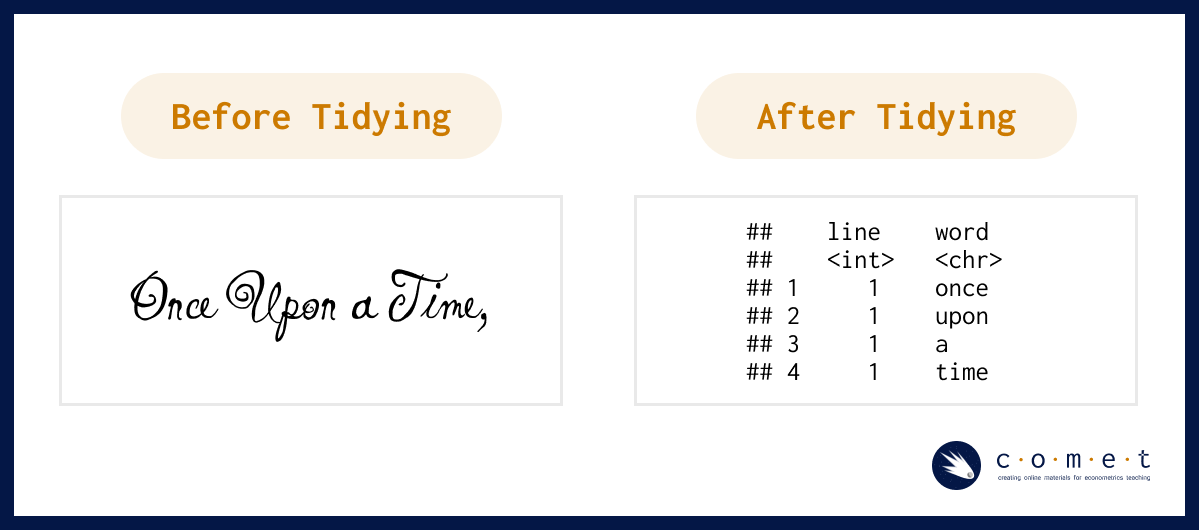
<figcaption aria-hidden="true">Tidy Text Example</figcaption>
</figure>

You may also be familiar with other formats that text can be stored in.
Hicks
[(2022)](https://www.stephaniehicks.com/jhustatcomputing2022/posts/2022-10-13-working-with-text-sentiment-analysis/)
outlines how textual data can be stored in strings, corpera and
document-term matrices:

-   **String**: text can, of course, be stored as strings, i.e.,
    character vectors, within R, and often text data is first read into
    memory in this form. (example: “here is a string of text.”)
-   **Corpus**: these types of objects typically contain raw strings
    annotated with additional metadata and details.
-   **Document-term matrix**: This is a sparse matrix describing a
    collection (i.e., a corpus) of documents with one row for each
    document and one column for each term. The value in the matrix is
    typically word count. <br>

If you have lots of experience with cleaning textual data sets, feel
free to skip to the next section - if you’re looking for more practice
with this, you’re right where you need to be! <br>

The following list contains a few things we want to consider when
preparing a textual dataset; many of these steps will be automatically
taken by sentiment analysis functions: \* **Stop words** are common
words that aren’t typically useful in textual analysis because they
don’t communicate very much meaning. Some common stop words include:
“to”, “the,” and “and.” <br>

You can look at a pre-defined list of stop words in the tidytext dataset
using this command:

In [ ]:
head(stop_words)

-   **Case matching** is one way we can remove noise in a textual
    dataset by transforming all characters to lowercase, especially if
    we don’t want our model to treat capitalized words differently from
    non-capitalized words.
-   **Punctuation removal** is another noise removal strategy. One
    important thing to consider is how punctuation removal can
    accidentally remove important meaning or structure to a text.

Next, we’ll run through a practice example using a predetermined lexicon
titled, `bing` which was created by Bing Liu and collaborators. The
lexicon contains a list of around 6800 English words which are
categorized as being either positive or negative. You can read more
about the lexicon
[here](https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html). One
thing to note about lexicon-based analyses that operate at the word
level is that they are not able to understand the sentiment of phrases
or pairs of words such as “not bad” or “not true.” Can you think of any
other phrases that might not work with a word-based analysis?

In [ ]:
# Construct a dataframe
username <- c("@potus", "@abject.ron", "@tess888", "@ayden99", "@curious_reggie", 
                    "@peter.the.third", "@xavier_w", "@humble.pacifist", 
                    "@krz4377", "@not.nat")
policy_text <- c("Today we changed prehistoric policies held our great country back from progress.", 
            "@potus this policy change is an abomination of everything America stands for", 
            "I have completely lost trust in the government", 
            "I am hopeful things will get better after this valuable change", 
            "Navigating the past is always a challenge, but one that can be overcome through hard work.",
            "Can our country recover from this?",
            "@ayden99 - Progress wins. A victory for America today.",
            "Poor call @potus - old rules kept us from making the mistakes of the past...",
            "I'm sick of aristocracy stamping out the people's power",
            "Definitely some mixed feelings about today's decision. Some wins, some losses, but hey - that's democracy.")

policy_df <- tibble(username = username, text=policy_text) |>
group_by(username)

policy_df 

Once we have a dataframe, we want to convert it into the tidytext
format. The `unnest_tokens` function helps us do that and includes
arguments which we can use to specify how we want this done. You can
learn more about the `unnest_tokens` function by inputing
`?unnest_tokens` into a code cell.

In [ ]:
policy_token <- policy_df  |>
    unnest_tokens(output = word, 
                  input = text,
                  token = "words", # this specifies that we want a token to be 1 word
                  to_lower = TRUE) # converts all text to uniform lowercase
            
head(policy_token)

In the above code, try changing the argument `token = "words"` to
`token = "characters"` or `token = "sentences"` <br> <br> What do you
see? <br> <br> If we were interested in running our sentiment analysis
at a higher level, for example, by considering sentences as tokens, we
could also do that. For the purpose of this analysis, we will be working
at the word level; be sure to return the above argument to
`token = "words"` when you are ready to continue the analysis.

#### Negative Sentiment

If we are only interested in identifying the words in our corpus of
tweets that contain negative (as opposed to positive) sentiment, we can
use the `bing` library. Let’s take a look at some of the words on the
`bing` list:

In [ ]:
head(get_sentiments("bing"))

In [ ]:
negative_sentiments <- get_sentiments("bing") %>% 
    filter(sentiment == "negative") # select only the negative words

negative_policy <- policy_token %>%
    inner_join(negative_sentiments) %>% 
    count(word, sort = TRUE) # count the number of negative words

head(negative_policy)

#### Negative and Positive Sentiment

In [ ]:
sentiment_policy <- policy_token %>%
    inner_join(get_sentiments("bing")) %>% # adds column with binary sentiment library
    count(word, sentiment) %>%
    pivot_wider(names_from = sentiment, values_from = n, values_fill = 0)
head(sentiment_policy)

#### Summarizing Sentence-level Sentiment

In [ ]:
summary_policy <- policy_token %>%
    inner_join(get_sentiments("bing")) %>% # adds column with binary sentiment library
    count(username, word, sentiment) %>%
    pivot_wider(names_from = sentiment, values_from = n, values_fill = 0) %>%
    mutate(sentiment = positive - negative)
summary_policy

In [ ]:
bing_word_counts <- policy_token |>
  inner_join(get_sentiments("bing")) |>
  count(word, sentiment, sort = TRUE) |>
  ungroup()

bing_word_counts

We can further look at the summed score for a given user’s tweet beyond
the individual words. <br> For example, if we ran the code below, we
would get a value of `0` because `(-1) + (+1) = 0`. <br> Try out a few
different usernames in the blank `...` code below: \* “@potus” \*
“@abject.ron” \* “@tess888” \* “@ayden99” \* “@curious_reggie” \*
“@peter.the.third” \* “@xavier_w” \* “@humble.pacifist” \* “@krz4377” \*
“@not.nat”

In [ ]:
user_summary <- summary_policy |>
filter(username == "@curious_reggie")|>
mutate(sentiment_sum = sum(sentiment))|>
select(username, sentiment_sum)|>
distinct()

user_summary

## Applied Analysis: Sentimental Analysis of r/UBC

In real use-cases, sentiment analysis isn’t done on small hand-made
datasets. Rather, it’s usually done on large, messy datasets pulled from
the internet. Now that we’ve looked at the basics of sentiment analysis,
let’s apply our skills to analysing the ***r/UBC*** subreddit. The r/ubc
subreddit is a subreddit ran by UBC students, for UBC students, that is
frequented by over 100 thousand members. We’ll attempt to answer the
following research question:

> ##### Which registertaion tool do students prefer most? Workday or the SSC?

To answer this question, we’ll apply the following steps:

1.  Scrape the top posts on r/UBC using the `RedditExtractoR` package
    and selected keywords.
2.  Preprocess our resulting dataset using `tidyverse`.
3.  Run sentimental analysis using the `quanteda` package.
4.  Create visualizations to back-up our research question using
    `ggplot2`.

The `RedditExtractoR` package will allow us to scrape reddit posts
directly from R, without having to log into reddit ourselves. This makes
it an effective tool for small-scale web scraping.

In [ ]:
library(RedditExtractoR)

### Downloaded Reddit posts

To find reddit posts, we’ll use the `find_thread_urls()` command. The
`keywords` argument specifies which keywords we’d like to have in our
reddit posts. We’ll create two dataframes, one with reddit posts with
the keyword “workday”, and the other with the keyword “ssc”.
Additionally, we’ll specify to sort by “top” for the most popular
results, and ensure that our subreddit is set it “UBC”.

**Depending on your internet speed, set** `sort=by = "top"` **and**
`period = "all"` **for best results.**

In [ ]:
rubc_urls_workday <- tibble(find_thread_urls(
keywords = "workday",
sort_by = "new",
subreddit = "ubc",
period = "day"
))

rubc_urls_ssc <- tibble(find_thread_urls(
keywords = "ssc",
sort_by = "new",
subreddit = "ubc",
period = "day"
))

Running the new dataframes will give you some examples of the different
comments and posts related to workday and the ssc, respectively.

In [ ]:
rubc_urls_workday

rubc_urls_ssc

We’ll also have to preprocess the comments to allow for sentiment
analysis. We’ll do so by removing individual numbers, punctuation,
separators and symbols. We’ll also remove unnessesary stopwords, as seen
earlier. Lastly, we’ll convert all the columns to characters.

In [ ]:
r_ubc_workday_cleaned <- rubc_urls_workday |>
select(text)|>
as.character()|>
 tokens(remove_numbers = TRUE, remove_punct = TRUE, remove_separators = TRUE, remove_symbols = TRUE)|>
 tokens_select(pattern = stopwords("en"), selection = "remove")

r_ubc_ssc_cleaned <- rubc_urls_ssc |>
select(text)|>
as.character()|>
 tokens(remove_numbers = TRUE, remove_punct = TRUE, remove_separators = TRUE, remove_symbols = TRUE)|>
 tokens_select(pattern = stopwords("en"), selection = "remove")

Let’s create a visualization of our two datasets, using the `wordcloud`
package.

In [ ]:
library(wordcloud)
set.seed(100)
wordcloud(r_ubc_workday_cleaned, min.freq=5, scale=c(5,0.25), colors=brewer.pal(8, "Dark2"))

wordcloud(r_ubc_ssc_cleaned, min.freq=5, scale=c(5,0.25), colors=brewer.pal(8, "Accent"))

### Downloading a Dictionary

For our analysis, we’ll be using a lexicon-based sentiment analysis
approach: grouping sentiment by either “negative” or “positive” using a
pre-labelled dictionary. We’ll download and use a **sentiment
dictionary**, a dataset of words which are split up into negative vesus
positive sentiments. This is particularly usefull when all we want to do
is quantitatively compare the amount of positive versus negative
sentiment in a dataset. We’ll be using the *opinion lexicon english
dictonary* for this task.

The dictionary itself is a set of two `.txt` files located under
`data > opinion-lexicon-english`. We’ll combine the two into a tibble
and associate the negative text file with negative sentiment, and the
positive text file with positive sentiment.

In [ ]:
positive.words.bl <- scan("data/opinion-lexicon-English/positive-words.txt", what = "char", sep = "\n", skip = 35, quiet = T)
negative.words.bl <- scan("data/opinion-lexicon-English/negative-words.txt", what = "char", sep = "\n", skip = 35, quiet = T)

sentiment.dictionary <- dictionary(list(positive = positive.words.bl, negative = negative.words.bl))
str(sentiment.dictionary)

### Conducting the Sentiment Analysis

We can now coduct sentiment analysis on the reddit comments. We’ll do so
using the `quanteda` package, as seen earlier. Using our dictionary from
earlier, we’ll comb through the datasets and isolate their sentiment
into a new dataframe. We’ll be doing a polar sentiment analysis, meaning
that we will assigning strictly positive or negative sentiment to each
entry. Additionally, we’ll standardize our sentiment values to be
between 0 and 1. This will allow for a more acurate visualization, as
the amount of rows in the ssc and workday datasets are different.

In [ ]:
sentiment.dictionary <- dictionary(list(positive = positive.words.bl, negative = negative.words.bl))

dfm_ubc_workday <- dfm(r_ubc_workday_cleaned)
dfm_ubc_ssc <- dfm(r_ubc_ssc_cleaned)

dfm_ubc_workday <- dfm_lookup(dfm_ubc_workday, dictionary = sentiment.dictionary)
dfm_ubc_ssc <- dfm_lookup(dfm_ubc_ssc, dictionary = sentiment.dictionary)

sentiment_ubc_workday <- convert(dfm_ubc_workday, to = "data.frame") |>
  gather(positive, negative, key = "Polarity", value = "Words")

sentiment_ubc_ssc <- convert(dfm_ubc_ssc, to = "data.frame") |>
  gather(positive, negative, key = "Polarity", value = "Words")

labels <- c("workday", "workday", "ssc", "ssc")

sentiment_ubc <- tibble(bind_rows(sentiment_ubc_workday, sentiment_ubc_ssc)) |>
  select(!doc_id) |>
  bind_cols(labels) |>
  rename(label = ...3)|>
  group_by(label)|>
  mutate(Words = Words/sum(Words))

sentiment_ubc

In [ ]:
sentiment_ubc_plot <- ggplot(sentiment_ubc, aes(x=label, y=Words, fill=Polarity,))+geom_bar(stat="identity", color="#faf3ff", linewidth=2)+ggtitle("Sentiment Analysis of posts related to the SSC versus Workday")+scale_fill_brewer(palette = "Paired")
sentiment_ubc_plot

Our analysis shows that there is slightly more negative sentiment
towards workday compared to the SSC, over the last year. However, it is
worth mentioning that these results are not entirely representative of
the sentiment of posts on r/UBC, primarily for two reasons:

**1) Traditional dictionary-based sentiment analysis struggles with
terms that are not in it’s reference dictionaries.** Therefore,
traditional sentiment analysis will not pick up negative “gen-Z” terms.
Take, for instance, the following post by *u/Zestyclose-Collar-76*:

> *WHY DOES WORKDAY SHOW MY AVERAGE: Literally triggering. I don’t want
> to be shown this against my will.*

The sentiment here is clearly negative: OP is expressing frustration
about having to see their GPA every time they open workday. However, the
word “triggering” is not listed as a negative word in the opinion
english lexicon. Thus, this post will not be considered “negative”.

**2) Dictonary-based entiment analysis struggles with irony, sarcasm,
and not explicitly negative/positive statements.** Consider the
following post by u/imFrenly:

> *I made workday more usable: I made a chrome extension that changes
> workday’s current course browsing layout to one that looks like the
> old SSC one. Hopefully this will make everyone’s lives easier!! Feel
> free to give feedback and report bugs to me. Installation instructions
> here: https://github.com/JustintyC/Custom-Workday-Courselist-Extension
> (Unfortunately this doesn’t work with the other side by side calendar
> extension, but its other non-calendar related features such as pfp
> removal still work)*

The context implied by this post is that workday is unusable, and
therefore, this student put together a Chrome extension to bypass some
of the issues. However, nothing in this post is explicitly critiquing
workday. The critique is implied through the context, something
traditional dictionary-based sentiment analysis cannot do.

## References

-   Air Force Institute of Technology. (n.d.). Text Mining: Sentiment
    Analysis · AFIT Data Science Lab R Programming Guide. Retrieved May
    31, 2024, from https://afit-r.github.io/sentiment_analysis
-   Benoit, K., Watanabe, K., Wang, H., Nulty, P., Obeng, A., Müller,
    S., & Matsuo, A. (2018). quanteda: An R package for the quantitative
    analysis of textual data. Journal of Open Source Software,
    3(30), 774. https://doi.org/10.21105/joss.00774
-   Hicks, S. (2022, October 13). Tidytext and sentiment analysis:
    Introduction to tidytext and sentiment analysis.
    https://www.stephaniehicks.com/jhustatcomputing2022/posts/2022-10-13-working-with-text-sentiment-analysis/
-   Hu, M., & Liu, B. (2004). Mining and summarizing customer reviews.
    Proceedings of the ACM SIGKDD International Conference on Knowledge
    Discovery and Data Mining (KDD-2004).
    https://doi.org/10.1145/1014052.1014073
-   Hussein, D. M. E.-D. M. (2018). A survey on sentiment analysis
    challenges. Journal of King Saud University - Engineering Sciences,
    30(4), 330–338. https://doi.org/10.1016/j.jksues.2016.04.002
-   imFrenly. (2024, June 27). I made workday more usable.
    https://www.reddit.com/r/UBC/comments/1dpe5so/i_made_workday_more_usable/
-   Liu, B. (2011). Sentiment Analysis and Opinion Mining. Department of
    Computer Science University Of Illinois at Chicago.
    https://www.cs.uic.edu/~liub/FBS/Sentiment-Analysis-tutorial-AAAI-2011.pdf
-   Robinson, D. (2016, July 21). Does sentiment analysis work? A tidy
    analysis of Yelp reviews. Variance Explained.
    http://varianceexplained.org/r/yelp-sentiment/
-   Silge, J., & Hvitfeldt, E. (2022). Supervised Machine Learning for
    Text Analysis in R. https://smltar.com/
-   Silge, J., & Robinson, D. (2017). Welcome to Text Mining with R \|
    Text Mining with R. https://www.tidytextmining.com/
-   Zestyclose-Collar-76. (2024, May 21). WHY DOES WORKDAY SHOW MY
    AVERAGE.
    https://www.reddit.com/r/UBC/comments/1cxjf77/why_does_workday_show_my_average/